Ladataan tarvittavat kirjastot:

> pandas; matematiikkakirjasto - https://pandas.pydata.org/

> numpy; toinen matematiikkakirjasto - https://numpy.org/doc/

> matplotlib; visualisointikirjasto - https://matplotlib.org/

> seaborn; visualisointikirjasto - https://seaborn.pydata.org/


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
dat = pd.read_csv("https://raw.githubusercontent.com/rerkki/metropolia/master/oura_trends.csv", encoding='latin-1')

dat[0:100] #tulostetaan otsikko ja 10 ensimmäistä riviä tarkistuksen vuoksi


,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Sleep Tranquility Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,Total Sleep Time,Awake Time,REM Sleep Time,Light Sleep Time,Deep Sleep Time,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Sleep Timing.1,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Recovery Time Score,Activity Burn,Total Burn,Target Calories,Steps,Daily Movement,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2020-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,100,100,1,1,1,100,11,1953,500,282,206,35,254,13,0,0,1138,1.15625,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-26,70.0,66.0,71.0,56.0,67.0,66.0,78.0,96.0,28680.0,22380.0,6300.0,4740.0,14820.0,2820.0,25.0,78.0,390.0,13200.0,NaN,2020-03-25T23:27:09+02:00,2020-03-26T07:25:09+02:00,51.17,49.0,64.0,-0.33,13.750,48,63,100,1,1,24,100,291,2343,550,6973,5721,655,495,206,28,0,56,1.34375,0,88.0,66.0,0.0,0.0,0.0,94.0,100.0,90.0,100.0
2,2020-03-27,76.0,76.0,75.0,95.0,79.0,63.0,67.0,79.0,29940.0,24870.0,5070.0,4950.0,15090.0,4830.0,36.0,83.0,180.0,15540.0,NaN,2020-03-26T23:22:40+02:00,2020-03-27T07:41:40+02:00,58.00,52.0,78.0,-0.10,14.000,50,60,95,1,1,46,100,315,2347,400,7943,6095,673,559,167,41,0,0,1.34375,1,82.0,74.0,88.0,86.0,95.0,100.0,78.0,93.0,52.0
3,2020-03-28,68.0,63.0,70.0,59.0,93.0,67.0,62.0,74.0,24300.0,21690.0,2610.0,4650.0,14100.0,2940.0,28.0,89.0,60.0,11730.0,NaN,2020-03-28T00:35:01+02:00,2020-03-28T07:20:01+02:00,61.91,56.0,48.0,-0.20,14.625,58,55,95,1,40,73,100,321,2331,400,8198,6113,669,578,141,52,0,0,1.34375,1,74.0,63.0,83.0,84.0,91.0,98.0,47.0,90.0,53.0
4,2020-03-29,69.0,73.0,95.0,49.0,65.0,68.0,70.0,55.0,31320.0,24180.0,7140.0,6300.0,15420.0,2460.0,26.0,77.0,210.0,14100.0,NaN,2020-03-29T00:33:01+03:00,2020-03-29T09:15:01+03:00,52.38,48.0,71.0,-0.33,14.375,71,100,100,1,71,95,100,296,2251,500,7598,5896,161,591,71,60,0,557,1.28125,0,85.0,65.0,84.0,84.0,89.0,94.0,100.0,NaN,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2020-05-21,80.0,84.0,86.0,88.0,74.0,70.0,67.0,81.0,33000.0,26700.0,6300.0,5670.0,16710.0,4320.0,24.0,81.0,180.0,15510.0,NaN,2020-05-20T23:18:57+03:00,2020-05-21T08:28:57+03:00,58.79,51.0,49.0,-0.09,15.125,77,94,100,25,71,96,100,463,2489,400,12215,9065,439,496,153,81,0,271,1.43750,0,82.0,79.0,89.0,88.0,90.0,100.0,91.0,77.0,44.0
58,2020-05-22,72.0,65.0,72.0,63.0,74.0,68.0,81.0,96.0,27180.0,22110.0,5070.0,4770.0,14220.0,3120.0,31.0,81.0,450.0,13050.0,NaN,2020-05-21T23:28:40+03:00,2020-05-22T07:01:40+03:00,57.09,53.0,68.0,-0.32,14.000,70,55,95,25,71,95,100,193,2232,400,4650,3663,696,531,205,8,0,0,1.28125,1,79.0,68.0,89.0,87.0,85.0,94.0,60.0,77.0,88.0
59,2020-05-23,76.0,87.0,87.0,74.0,72.0,67.0,70.0,56.0,34320.0,27390.0,6930.0,5760.0,17970.0,3660.0,31.0,80.0,210.0,17760.0,NaN,2020-05-22T23:31:54+03:00,2020-05-23T09:03:54+03:00,59.38,52.0,60.0,0.29,14.875,70,67,78,25,71,95,100,291,2300,400,7531,5689,613,638,142,47,0,0,1.31250,2,84.0,73.0,94.0,89.0,87.0,80.0,92.0,77.0,66.0
60,2020-05-24,69.0,66.0,71.0,36.0,81.0,69.0,97.0,68.0,26940.0,22470.0,4470.0,4710.0,15930.0,1830.0,28.0,83.0,960.0,14070.0,NaN,2020-05-24T00:07:53+03:00,2020-05-24T07:36:53+03:00,61.65,52.0,60.0,0.29,15.250,74,45,78,43,96,96,100,405,2484,400,10330,7913,800,407,166,67,0,0,1.43750,

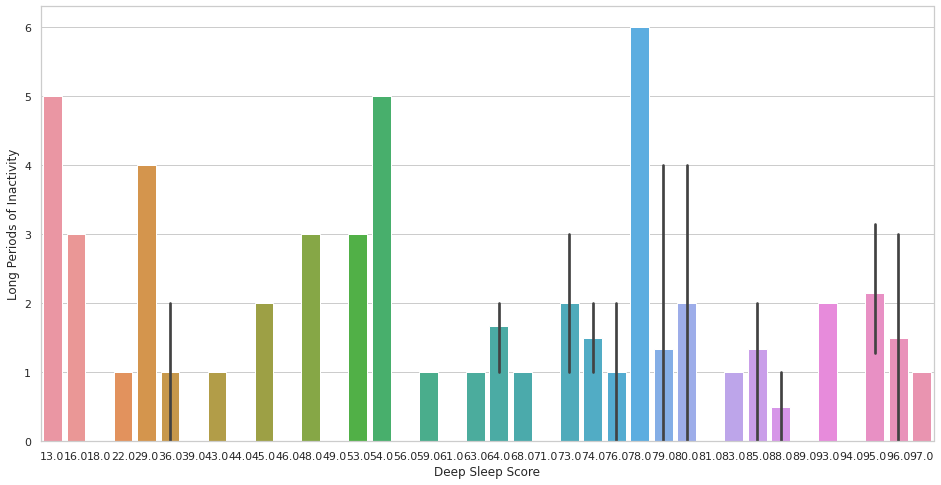

In [22]:
sns.set(style="whitegrid", rc={'figure.figsize':(16,8)})

ax = sns.barplot(x=dat['Deep Sleep Score'], y=dat['Long Periods of Inactivity'], )

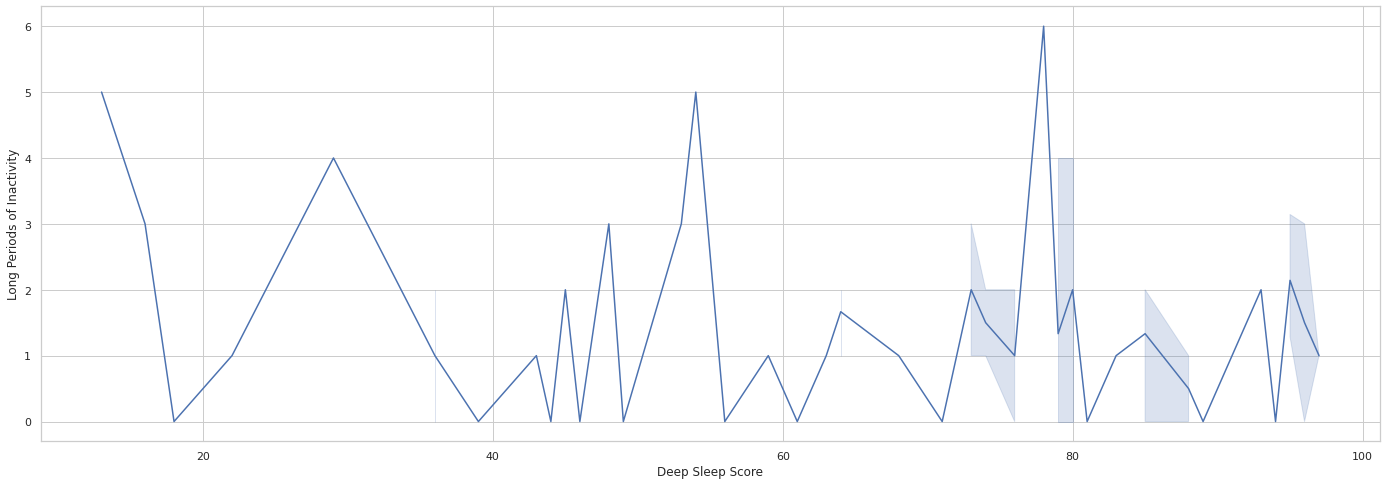

In [23]:
sns.set(style="whitegrid", rc={'figure.figsize':(24,8)})

fig, ax =plt.subplots(1)
sns.lineplot(x=dat['Deep Sleep Score'], y=dat['Long Periods of Inactivity'], )


fig.show()



In [28]:
dat2 = dat.rename(columns={'Sleep Score': 'K1', 
                      'Total Sleep Score': 'K2',
                      'REM Sleep Score': 'K3',
                      'Deep Sleep Score': 'K4',
                      'Sleep Efficiency Score': 'K5',
                      'Sleep Tranquility Score': 'K6',
                      'Sleep Latency Score': 'K7',
                      'Sleep Timing Score': 'K8',
                      'Total Bedtime': 'K9',
                      'Total Sleep Time' : 'K10',
                      'Awake Time' : 'K11',
                      'REM Sleep Time' : 'K12',
                      'Light Sleep Time' : 'K13',
                      'Deep Sleep Time' : 'K14',
                      'Restless Sleep' : 'K15',
                      'Sleep Efficiency' : 'K16',
                      'Sleep Latency' : 'K17',
                      'Sleep Timing' : 'K18',
                      'Sleep Timing.1' : 'K19',
                      'Bedtime Start' : 'K20',
                      'Bedtime End' : 'K21',
                      'Average Resting Heart Rate' : 'K22',
                      'Lowest Resting Heart Rate' : 'K23',
                      'Average HRV' : 'K24',
                      'Temperature Deviation' : 'K25',
                      'Respiratory Rate' : 'K26',
                      'Activity Score' : 'K27',
                      'Stay Active Score' : 'K28',
                      'Move Every Hour Score' : 'K29',
                      'Meet Daily Targets Score' : 'K30',
                      'Training Frequency Score' : 'K31',
                      'Training Volume Score' : 'K32',
                      'Recovery Time Score' : 'K33',
                      'Activity Burn' : 'K34',
                      'Total Burn' : 'K35',
                      'Target Calories' : 'K36',
                      'Steps' : 'K37',
                      'Daily Movement' : 'K38',
                      'Inactive Time' : 'K39',
                      'Rest Time' : 'K40',
                      'Low Activity Time' : 'K41',
                      'Medium Activity Time' : 'K42',
                      'High Activity Time' : 'K43',
                      'Non-wear Time' : 'K44',
                      'Average MET' : 'K45',
                      'Long Periods of Inactivity' : 'K46',
                      'Readiness Score' : 'K47',
                      'Previous Night Score' : 'K48',
                      'Sleep Balance Score' : 'K49',
                      'Previous Day Activity Score' : 'K50',
                      'Activity Balance Score' : 'K51',
                      'Temperature Score' : 'K52',
                      'Resting Heart Rate Score' : 'K53',
                      'HRV Balance Score' : 'K54',
                      'Recovery Index Score': 'K55'})

dat2[1:15] #tulostetaan otsikko ja ensimmäinen rivi tarkistuksen vuoksi


,date,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18,K19,K20,K21,K22,K23,K24,K25,K26,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,K40,K41,K42,K43,K44,K45,K46,K47,K48,K49,K50,K51,K52,K53,K54,K55
1,2020-03-26,70.0,66.0,71.0,56.0,67.0,66.0,78.0,96.0,28680.0,22380.0,6300.0,4740.0,14820.0,2820.0,25.0,78.0,390.0,13200.0,NaN,2020-03-25T23:27:09+02:00,2020-03-26T07:25:09+02:00,51.17,49.0,64.0,-0.33,13.750,48,63,100,1,1,24,100,291,2343,550,6973,5721,655,495,206,28,0,56,1.34375,0,88.0,66.0,0.0,0.0,0.0,94.0,100.0,90.0,100.0
2,2020-03-27,76.0,76.0,75.0,95.0,79.0,63.0,67.0,79.0,29940.0,24870.0,5070.0,4950.0,15090.0,4830.0,36.0,83.0,180.0,15540.0,NaN,2020-03-26T23:22:40+02:00,2020-03-27T07:41:40+02:00,58.00,52.0,78.0,-0.10,14.000,50,60,95,1,1,46,100,315,2347,400,7943,6095,673,559,167,41,0,0,1.34375,1,82.0,74.0,88.0,86.0,95.0,100.0,78.0,93.0,52.0
3,2020-03-28,68.0,63.0,70.0,59.0,93.0,67.0,62.0,74.0,24300.0,21690.0,2610.0,4650.0,14100.0,2940.0,28.0,89.0,60.0,11730.0,NaN,2020-03-28T00:35:01+02:00,2020-03-28T07:20:01+02:00,61.91,56.0,48.0,-0.20,14.625,58,55,95,1,40,73,100,321,2331,400,8198,6113,669,578,141,52,0,0,1.34375,1,74.0,63.0,83.0,84.0,91.0,98.0,47.0,90.0,53.0
4,2020-03-29,69.0,73.0,95.0,49.0,65.0,68.0,70.0,55.0,31320.0,24180.0,7140.0,6300.0,15420.0,2460.0,26.0,77.0,210.0,14100.0,NaN,2020-03-29T00:33:01+03:00,2020-03-29T09:15:01+03:00,52.38,48.0,71.0,-0.33,14.375,71,100,100,1,71,95,100,296,2251,500,7598,5896,161,591,71,60,0,557,1.28125,0,85.0,65.0,84.0,84.0,89.0,94.0,100.0,NaN,89.0
5,2020-03-30,71.0,69.0,60.0,85.0,67.0,66.0,67.0,90.0,29880.0,23160.0,6720.0,3990.0,14970.0,4200.0,31.0,78.0,180.0,13650.0,NaN,2020-03-29T23:31:32+03:00,2020-03-30T07:49:32+03:00,53.91,48.0,78.0,0.11,13.875,65,56,78,1,96,96,100,409,2438,500,9764,7999,657,534,188,61,0,0,1.40625,2,87.0,68.0,83.0,94.0,89.0,95.0,100.0,95.0,83.0
6,2020-03-31,69.0,75.0,77.0,13.0,72.0,66.0,72.0,95.0,30540.0,24540.0,6000.0,5100.0,18810.0,630.0,29.0,80.0,270.0,14790.0,NaN,2020-03-30T23:02:31+03:00,2020-03-31T07:31:31+03:00,53.99,49.0,64.0,-0.13,14.625,58,41,25,1,100,97,100,340,2347,400,8271,6597,788,478,123,51,0,0,1.34375,5,81.0,65.0,83.0,80.0,85.0,100.0,100.0,NaN,68.0
7,2020-04-01,67.0,46.0,40.0,95.0,97.0,72.0,67.0,100.0,19080.0,17550.0,1530.0,2700.0,10200.0,4650.0,20.0,92.0,150.0,9420.0,NaN,2020-04-01T00:16:43+03:00,2020-04-01T05:34:43+03:00,54.98,51.0,64.0,-0.45,14.250,67,44,43,25,100,97,100,455,2530,400,11840,8997,805,367,195,73,0,0,1.46875,4,76.0,63.0,75.0,77.0,79.0,90.0,73.0,94.0,70.0
8,2020-04-02,64.0,54.0,49.0,48.0,81.0,67.0,70.0,100.0,23280.0,19500.0,3780.0,3270.0,13830.0,2400.0,28.0,84.0,210.0,10860.0,NaN,2020-04-01T23:42:12+03:00,2020-04-02T06:10:12+03:00,60.47,54.0,46.0,-0.06,14.500,75,55,60,43,100,98,100,449,2523,400,11324,8698,683,463,191,67,0,36,1.46875,3,73.0,59.0,70.0,70.0,74.0,100.0,65.0,89.0,90.0
9,2020-04-03,77.0,73.0,59.0,93.0,90.0,72.0,70.0,96.0,27360.0,24060.0,3300.0,3960.0,15540.0,4560.0,27.0,88.0,240.0,13740.0,NaN,2020-04-02T23:18:32+03:00,2020-04-03T06:54:32+03:00,53.87,49.0,63.0,-0.01,14.250,77,66,78,43,100,98,98,389,2415,400,9306,7312,630,574,182,51,3,0,1.37500,2,82.0,75.0,72.0,78.0,71.0,100.0,100.0,89.0,100.0
10,2020-04-04,69.0,88.0,96.0,36.0,23.0,38.0,86.0,89.0,47820.0,27660.0,20160.0,6780.0,19050.0,1830.0,38.0,58.0,570.0,30390.0,NaN,2020-04-03T18:54:49+03:00,2020-04-04T08:11:49+03:00,64.94,53.0,63.0,-0.13,14.125,85,100,100,43,100,96,100,63,1984,400,1289,1252,195,624,63,2,0,556,1.12500,0,74.0,65.0,79.0,82.0,70.0,100.0,73.0,89.0,52.0


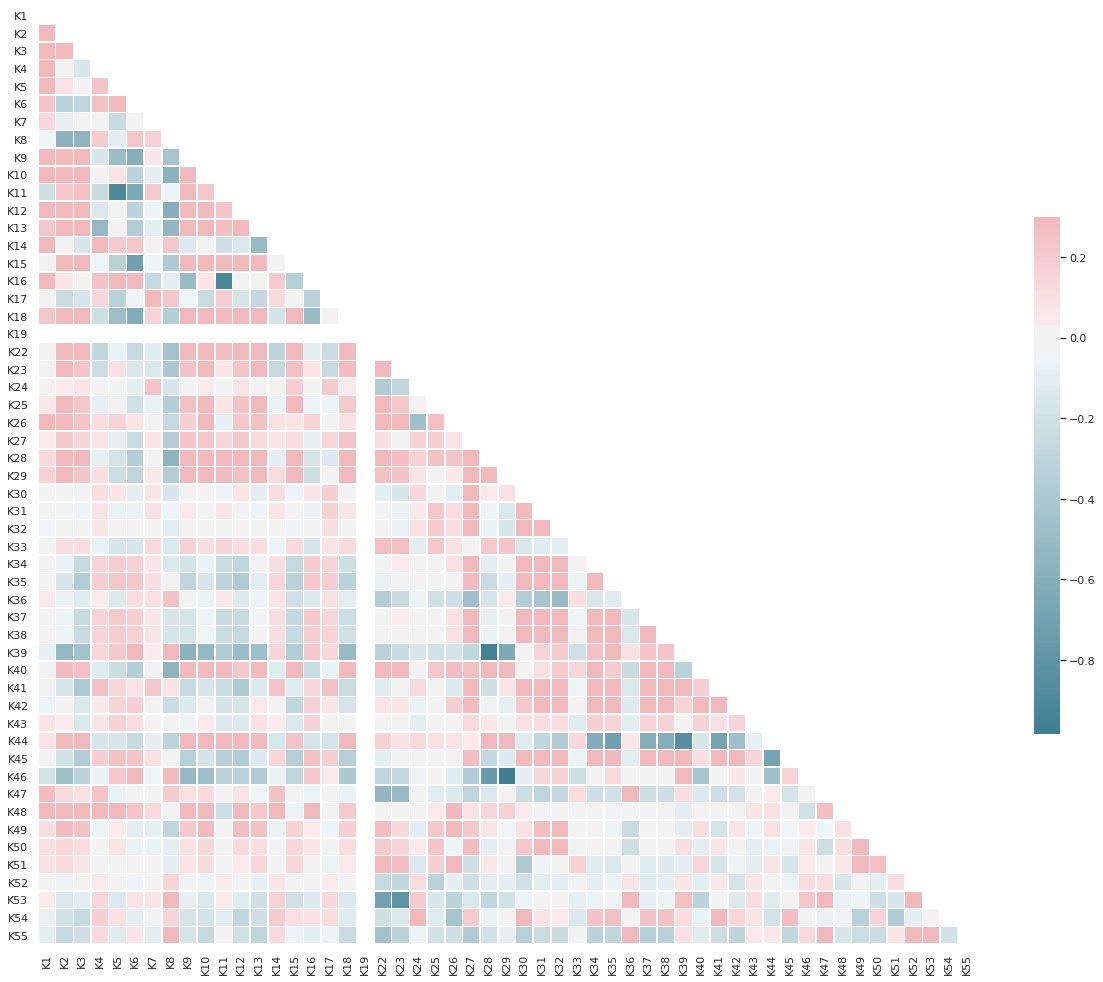

In [32]:
dat = dat2[['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'K11', 'K12', 'K13', 'K14', 'K15', 'K16', 'K17', 'K18', 'K19', 'K20', 'K21', 'K22', 'K23', 'K24', 'K25', 'K26', 'K27', 'K28', 'K29', 'K30', 'K31', 'K32', 'K33', 'K34', 'K35', 'K36', 'K37', 'K38', 'K39', 'K40', 'K41', 'K42', 'K43', 'K44', 'K45', 'K46', 'K47', 'K48', 'K49', 'K50','K51', 'K52', 'K53', 'K54', 'K55']]

corr = dat.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(21, 19))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

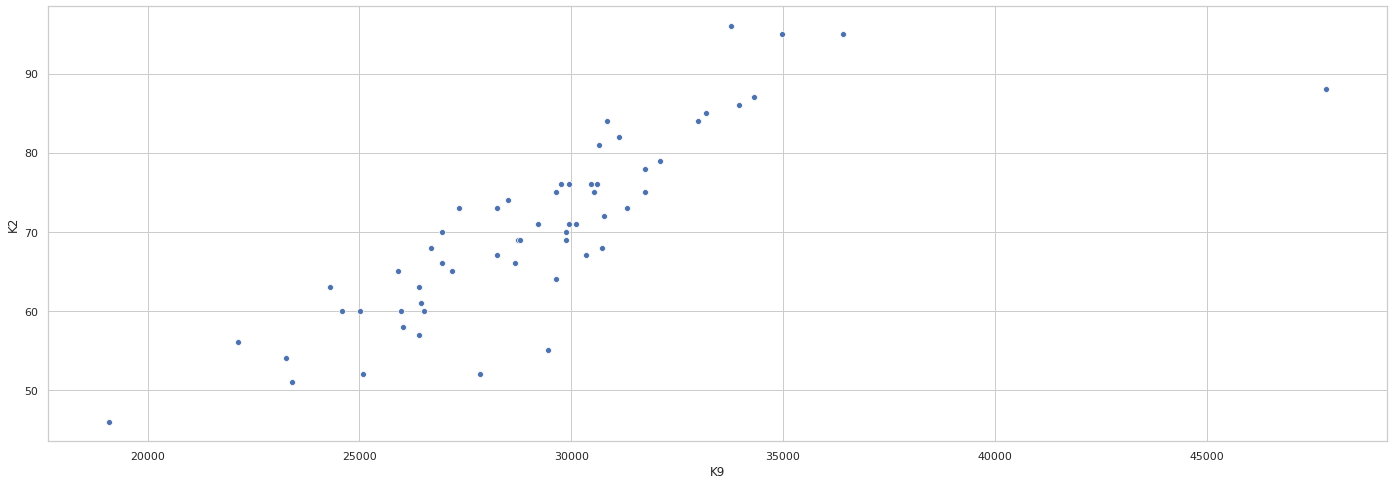

In [34]:
sns.scatterplot(x=dat['K9'], y=dat['K2'], data=dat, palette='Set1');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

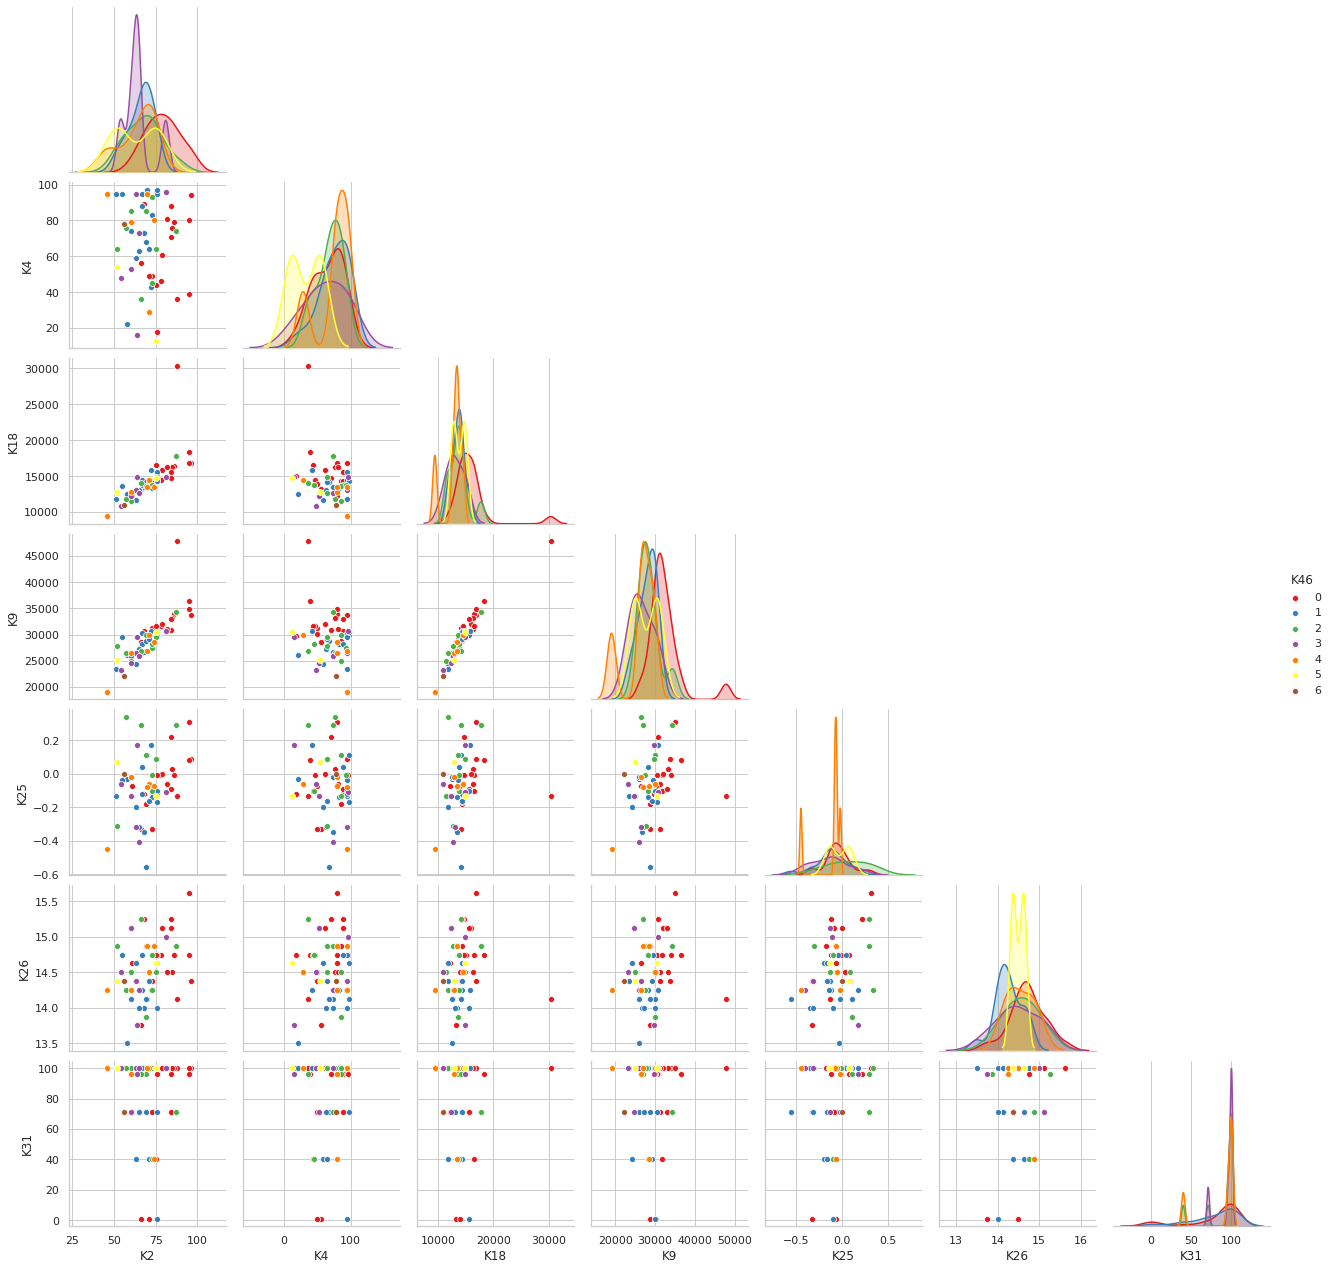

In [37]:
df = dat[['K2', 'K4', 'K18', 'K9', 'K46', 'K25','K26', 'K31']]
sns.pairplot(data=df,  corner = True, hue = 'K46', palette='Set1');